In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ベクトル
数式では次のように書かれる。ベクトルは縦に書くが、スペース節約で横書きされる事も多い (横書きの際は^Tが付く)。

$$
    {\bf a}=\left[\begin{array}{c}2 \\ 1\end{array}\right]
    \quad
    {\bf b}=\left[\begin{array}{c}1 \\ 3\end{array}\right]
    \quad
    {\bf b}^T=\left[\begin{array}{c}1 & 3\end{array}\right]
$$

In [3]:
# pythonでは次のように書かれる
a = np.array([2, 1])
print(repr(a))

# numpyに縦横ベクトルの区別は無い。あえてやる場合は行列化する
b = np.array([1, 3]) 
print(repr(b[np.newaxis,:].T))

array([2, 1])
array([[1],
       [3]])


## 加算
加算は各成分を足し合わせる。図にプロットすると加算した2ベクトルの間を示すベクトルが得られる。

$$
    {\bf a} + {\bf b} = \left[\begin{array}{c}2+1 \\ 1+3\end{array}\right]
        = \left[\begin{array}{c}3 \\ 4\end{array}\right]
$$

In [96]:
a = np.array([2, 1])
b = np.array([1, 3]) 
a + b

array([3, 4])

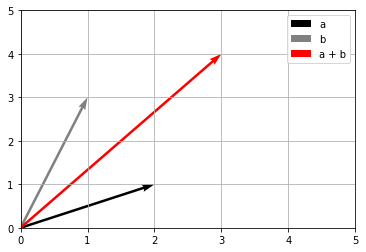

In [10]:
a = np.array([2, 1])
b = np.array([1, 3])
c = a + b

plt.quiver(0, 0, a[0], a[1], color="black", label="a", angles='xy',scale_units='xy',scale=1)
plt.quiver(0, 0, b[0], b[1], color="gray", label="b", angles='xy',scale_units='xy',scale=1)
plt.quiver(0, 0, c[0], c[1], color="red", label="a + b", angles='xy',scale_units='xy',scale=1)

plt.xlim([0,5])
plt.ylim([0,5])
plt.grid()
plt.legend()

## ノルム
ベクトルには大きさの概念がある。これはベクトルの長さを表す。特に2次元ベクトルの場合には縦y横xの三角形の斜辺の長さの公式そのものになる。

$$
    |{\bf a}|=\left|\left[\begin{array}{c} a_0 \\ a_1 \end{array}\right]\right|
             =\sqrt{a_0^2+a_1^2}
$$

## 内積
numpyではベクトル同士の積は和と同じく各成分の積を導出する。また一方で、ベクトルには内積というものがある。内積はベクトルaの先端からベクトルbの線へ垂直に直行するよう線を引いた際に線が直交する場所までの長さを持つベクトルcを定義した際、ベクトルcとbのノルムを掛けた値になる。この値は二つのベクトルの角度の近さを示す値として使用できる。

$$
\begin{align*}
    {\bf a} \cdot {\bf b}
        &= \left[\begin{array}{c} 1 \\ 3 \end{array}\right]\cdot
           \left[\begin{array}{c} 4 \\ 2 \end{array}\right]
         = 1 \times 4 + 3 \times 2 = 10
         = |{\bf a}||{\bf b}|\cos\theta \\
\end{align*}
$$

In [17]:
np.math.cos(np.math.radians(45))

0.7071067811865476

10 4.47213595499958


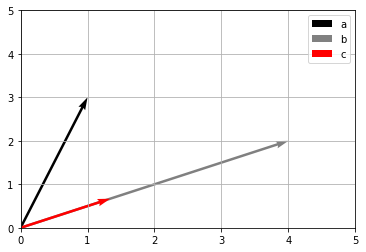

In [11]:
a = np.array([1, 3])
b = np.array([4, 2])
# 上記の公式を使用し、cのノルムを導出
# (abドット積(|a||b|cosθ)をbノルムで割り、cノルム(|a|cosθ)導出。
# bノルムとの長さの比率を出し、ベクトルbへスカラ倍する事でベクトルcを求める)
c = b * np.sqrt((a @ b) / np.linalg.norm(b)) / np.linalg.norm(b)

print(a @ b, np.linalg.norm(b))
plt.quiver(0, 0, a[0], a[1], color="black", label="a", angles='xy',scale_units='xy',scale=1)
plt.quiver(0, 0, b[0], b[1], color="gray", label="b", angles='xy',scale_units='xy',scale=1)
plt.quiver(0, 0, c[0], c[1], color="red", label="c", angles='xy',scale_units='xy',scale=1)

plt.xlim([0,5])
plt.ylim([0,5])
plt.legend()
plt.grid()

# 和の記号
ループ処理を使用した足し算は数式ではシグマ記号(Σ)を使うことで表現できる。

$$
    a = \sum_{i=0}^{n}f(i)
$$

上の式の各部分を次の定義とし、pythonで記述する。

$$
\begin{align}
    n &= 10 \\
    f(n) &= 2n
\end{align}
$$

In [113]:
# f関数
def f(n):
    return 2 * n

# Σの部分
a = 0
for i in range(10):
    a += f(i)

print(repr(a))

90


シグマは次の式変形が可能。微分する際に式変形で簡略化することがあります。

$$
    \begin{align}
        & \sum_{i=0}^{n}3 &&= 3n \tag{1}\\
        & \sum_{i=0}^{n}2n^2 &&= 2\sum_{i=0}^{n}n^2 \tag{2}\\
        & \sum_{i=0}^{n}2n^2+3n+4 &&=
            2\sum_{i=0}^{n}n^2 + 3\sum_{i=0}^{n}n + 4n \tag{3} \\
    \end{align}
$$

ちなみに内積はシグマで表現することが可能。

$$
    \begin{align}
    {\bf a} \cdot {\bf b} =
        \left[\begin{array}{c} a_0 \\ \vdots \\ a_n \end{array}\right]\cdot
        \left[\begin{array}{c} b_0 \\ \vdots \\ b_n \end{array}\right]=
        \sum_{i=0}^{n}a_ib_i
    \end{align}
$$

# 積の記号
ループ内の積にも該当する数学的記号があり、パイ記号(Π)が使える。

$$
    a = \displaystyle\prod_{i=1}^{n}f(i)
$$

上の式の各部分を次の定義とし、pythonで記述する。

$$
    \begin{align}
        n &= 5 \\
        f(n) &= n^2
    \end{align}
$$

In [112]:
# f関数
def f(n):
    return 2 ** n

# Πの部分
a = 1
for i in range(5):
    a *= f(i)

print(repr(a))

1024


# 微分

## 常微分
微分は関数の任意の点の傾きを導出する。dの付いた分数を付けることで分子を微分することを示す。以下の式の場合はw\**nをwで微分することを示し、その結果はnw\**(n-1)になる。

$$ \frac{d w^n}{dw} = nw^{n-1} $$

微分には次の性質がある。特に(3)は連鎖律と言われる。

$$
\begin{align}
    & \frac{d}{dw}w^3 &&= 3w^2 \tag{1} \\
    & \frac{d}{dw}(2w^3+3w^2+2) &&= 2\frac{d}{dw}w^2 + 3\frac{d}{dw}w^2 + \frac{d}{dw}2 \tag{2} \\
    & \frac{d}{dw}f(g(w)) &&= \frac{df}{dg} \cdot \frac{dg}{dw} \tag{3} \\
    & \frac{d a^x}{d x} &&= a^x\ln a \tag{4} \\
    & \frac{d \ln x}{d x} &&= \frac{1}{x} \tag{5} \\
\end{align}
$$

## 偏微分
偏微分は式を部分的に微分する。微分対象の変数以外は定数として扱われる。入れ子関数以外では常微分と同じ。

$$
    \frac{\partial (w_0^2+2w_1w_0+3)}{\partial w_0} = 2w_0+2w_1 \tag{1}
$$

$w_0^2+2w_1w_0+3$ をグラフにプロットすると以下の形状をとる。偏微分は微分する変数の軸に対して、平行に切り出した断面の微分変数軸に対する傾きを出す式になっている。

Text(0.5,0.92,'$f(w_0, w_1)={w_0}^2 + 2{w_0}{w_1} + 3$')

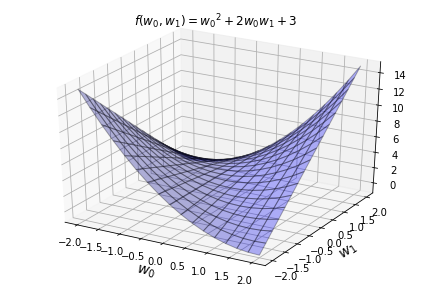

In [190]:
w_range = 2
w0 = w1 = np.linspace(-w_range, w_range, int((w_range * 2) / 0.25 + 1))
ww0, ww1 = np.meshgrid(w0, w1)
ff = ww0**2 + 2*ww0*ww1 + 3

plt.figure(figsize=(25, 5))
ax = plt.subplot(1, 3, 2, projection="3d")
ax.plot_surface(ww0, ww1, ff, color="blue", alpha=0.3, edgecolor="black")
ax.set_xlabel("$w_0$", fontsize=14)
ax.set_ylabel("$w_1$", fontsize=14)
plt.title("$f(w_0, w_1)={w_0}^2 + 2{w_0}{w_1} + 3$")

また、それぞれの変数毎に偏微分した結果を束ねてベクトルとしたものを **勾配ベクトル** と呼ぶ。勾配ベクトルは任意の点からより高い方向を指し示す性質がある。これは関数の最大点や最小点を探すのに重要で、機械学習では誤差関数の最小点導出で勾配ベクトルが計算されたりする。次のセルで上記の式の各点での勾配ベクトルを求めてみる。

$$
\begin{align*}
    f(w_0,w_1) &= w_0^2+2w_1w_0+3 \tag{1} \\
    \nabla_{w}{f}
        &= \left[\begin{array}{c}
            \displaystyle\frac{\partial f}{\partial w_0} \\
            \displaystyle\frac{\partial f}{\partial w_1} \\
            \end{array}\right] \tag{2} \\
        &= \left[\begin{array}{c}
            2w_0+2w_1 \\
            2w_0
            \end{array}\right]
\end{align*}
$$


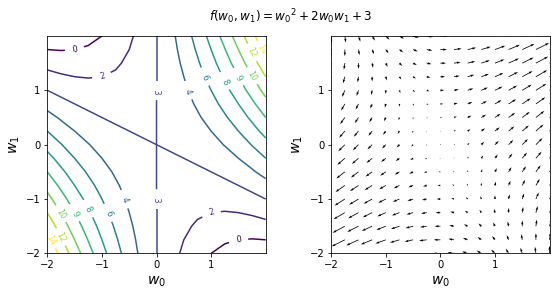

In [191]:
def applyStyle():
    plt.xticks(range(-w_range, w_range, 1))
    plt.yticks(range(-w_range, w_range, 1))
    plt.xlim(-w_range, w_range)
    plt.ylim(-w_range, w_range)
    plt.xlabel("$w_0$", fontsize=14)
    plt.ylabel("$w_1$", fontsize=14)

# 前セルの式の偏微分を行う
dff_dw0 = 2 * ww0 + 2 * ww1
dff_dw1 = 2 * ww0

# グラフ描画 初期設定
plt.figure(figsize=(9, 4))
plt.suptitle("$f(w_0, w_1)={w_0}^2 + 2{w_0}{w_1} + 3$")

# グラフ描画 (等高線)
plt.subplots_adjust(wspace=0.3)
plt.subplot(1, 2, 1)
cont = plt.contour(ww0, ww1, ff, 10)
cont.clabel(fmt="%2.0f", fontsize=8)
applyStyle()

# グラフ描画 (勾配ベクトル)
plt.subplot(1, 2, 2)
plt.quiver(ww0, ww1, dff_dw0, dff_dw1)
applyStyle()

偏微分には次の性質がある。偏微分の場合にもシグマの性質が成り立つ。

$$
\begin{align}
    \frac{\partial}{\partial w_0} f(g_0(w_0,w_1) \cdots g_m(w_0,w_1))
        &= \sum_{i=0}^{m} \frac{\partial f}{\partial g_i} \cdot \frac{\partial g_i}{\partial w_0} \\
    \frac{\partial}{\partial w}\sum_{n}f_n(w)
        &= \sum_{n}\frac{\partial}{\partial w}f_n(w) \\
\end{align}
$$

# 行列
数値を縦または横に並べたものをベクトルと呼ぶが、縦横両方へ並べたものは行列と呼ぶ。複数の連立方程式の表現や任意の次元数のデータを統一的に扱う際にベクトルと合わせて有効。

$$
    \boldsymbol{A} = \left[\begin{array}{ccc}
        a_{0,0} & \cdots & a_{0,x} \\
        \vdots & \ddots & \vdots \\
        a_{y,0} & \cdots & a_{y,x} \\
    \end{array}\right]
$$

行列には次の性質がある。
$$
    \sum_{n=0}^{N-1}\boldsymbol{A_n}\boldsymbol{B_n^T} = \boldsymbol{A^T}\boldsymbol{B} \tag{1} \\
$$

## 内積
行列にも内積がある。しかし、行列の内積は可換則が成り立たない。

$$
    \begin{array}{cc|ccc}
        & & b_{0,0} & b_{0,1} & b_{0,2} \\
        & & b_{1,0} & b_{1,1} & b_{2,2} \\
        \hline
        a_{0,0} & a_{0,1} &
        a_{0,0}b_{0,0}+a_{0,1}b_{1,0} & a_{0,0}b_{0,1}+a_{0,1}b_{1,1} & a_{0,0}b_{0,2}+a_{0,1}b_{1,2} \\
        a_{1,0} & a_{1,1} &
        a_{1,0}b_{0,0}+a_{1,1}b_{1,0} & a_{1,0}b_{0,1}+a_{1,1}b_{1,1} & a_{1,0}b_{0,2}+a_{1,1}b_{1,2} \\
        a_{2,0} & a_{2,1} &
        a_{2,0}b_{0,0}+a_{2,1}b_{1,0} & a_{2,0}b_{0,1}+a_{2,1}b_{1,1} & a_{2,0}b_{0,2}+a_{2,1}b_{1,2} \\
    \end{array}
$$



In [20]:
a = np.arange(6).reshape(3, 2)
b = a.T

# 行列もdotで内積を出せる
a @ b

array([[ 1,  3,  5],
       [ 3, 13, 23],
       [ 5, 23, 41]])

## 単位行列
縦横同サイズ(正方行列と呼ぶ)のうち、対角成分のみ1で他が0の行列を単位行列と呼ぶ。

$$
    \boldsymbol{I} = \left[\begin{array}{ccc}
        1 & 0 & 0 \\
        0 & 1 & 0 \\
        0 & 0 & 1 \\
    \end{array}\right]
$$

In [216]:
# 単位行列を生成
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## 逆行列
逆数の行列版。もとの行列と逆行列を掛けると単位行列が出来る。

$$
    \boldsymbol{A} = \left[\begin{array}{cc} 0 & 1 \\ 2 & 3 \\ \end{array}\right] \quad
    \boldsymbol{A}^{-1} = \left[\begin{array}{cc} -1.5 & 0.5 \\ 1 & 0 \\ \end{array}\right] \quad
    \boldsymbol{A} \cdot \boldsymbol{A}^{-1} = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \\ \end{array}\right]
$$

In [8]:
# 2x2行列A
a = np.arange(4).reshape((2, 2))
print(repr(a))

# 行列Aの逆数A^-1
b = np.linalg.inv(a)
print(repr(b))

# 内積が2x2の単位行列になる
a @ b

array([[0, 1],
       [2, 3]])
array([[-1.5,  0.5],
       [ 1. ,  0. ]])


array([[1., 0.],
       [0., 1.]])

## 転置行列
行と列を入れ替えた行列を転置行列と呼ぶ。転置行列では次の性質が成り立つ。

$$
\begin{align}
    (\boldsymbol{A}\boldsymbol{B})^T &= \boldsymbol{B}^T\boldsymbol{A}^T \tag{1}\\
    (\boldsymbol{A}\boldsymbol{B}\boldsymbol{C})^T &=
        \boldsymbol{C}^T\boldsymbol{B}^T\boldsymbol{A}^T \tag{2}\\
\end{align}
$$

In [239]:
a = np.arange(6).reshape((2, 3))
print(repr(a))

# 転置行列はTフィールドから得られる
print(repr(a.T))

array([[0, 1, 2],
       [3, 4, 5]])
array([[0, 3],
       [1, 4],
       [2, 5]])


## 指数

$$
\begin{align}
    a^0 &= 1 &
    a^{-1} &= \frac{1}{a^n} &
    a^{\frac{1}{n}} &= \sqrt[n]{a} &
    a^n \times a^m &= a^{n+m} \\
    \frac{a^n}{a^m} &= a^{n-m} &
    (a^n)^m &= a^{nm} &
    (ab)^n &= a^nb^n &
\end{align}
$$

## 対数

$$
\begin{align}
    \log_axy &= \log_ax + \log_ay \\
    \log_a\frac{x}{y} &= \log_ax - \log_ay \\
    \log_ax^y &= y\log_ax \\
    \log_ax &= \frac{\log_bx}{\log_ba} \\
    \log\textstyle\prod_{n=1}^{N}f(n) &= \textstyle\sum_{n=1}^{N}\log f(n) \\
\end{align}
$$

# よく用いられる関数
## シグモイド関数
シグモイド関数は入力xを0～1までの数値に変換する。確率を扱う際に都合がよく、分類問題で分類が確率で表現するロジスティック回帰に登場する。またニューラルネットワークでも、活性化関数と呼ばれる部分で線形関数を非線形にするために使用されている (近年は別関数が人気ですが)。

$$
\begin{align}
    y &= \frac{1}{1 + \exp(-x)} \\
    y^\prime &= y(1 - y) \\
\end{align}
$$

シグモイド関数の導関数は次のように求まる
$$
\begin{align}
    y &= \frac{1}{f} \\
    f &= 1 + \exp(-x) \\
    y^{\prime}
        &= \frac{\partial y}{\partial f} \frac{\partial f}{\partial x} \\
        &= -f^{-2} (-\exp(-x)) \\
        &= \frac{1}{(1 + \exp(-x))^2} \exp(-x) \\
        &= \frac{1}{1 + \exp(-x)} \frac{\exp(-x)}{1 + \exp(-x)} \\
        &= \frac{1}{1 + \exp(-x)} \left( \frac{1 + \exp(-x)}{1 + \exp(-x)} \frac{1}{1 + \exp(-x)} \right) \\
        &= y(1 - y) \\
\end{align}
$$

0.5

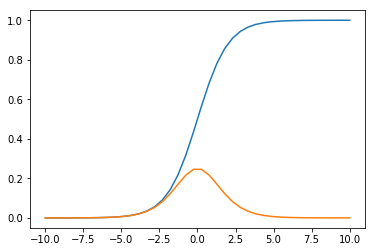

In [32]:
x = np.linspace(-10, 10, 40)

# 関数出力
y =  1 / (1 + np.exp(-x))
plt.plot(x, y)

# 微分出力
dy = y * (1 - y)
plt.plot(x, dy)
np.average(y)

## ソフトマックス関数
複数の変数があり、変数の大小関係を維持しつつ確率に変換したい場合にソフトマックス関数が使用できる。この関数もロジスティック回帰やニューラルネットワークで使用される。導関数の導出過程は面倒だった。

$$
\begin{align}
    y_i &= \frac{\exp(x_i)}{\sum_k \exp(x_k)} \\
    \frac{\partial y_i}{\partial y_j} &=
        \begin{cases}
            y_i (1 - y_j) & (i = j) \\
            -y_i y_j & {\rm otherwise} \\
        \end{cases}
\end{align}
$$

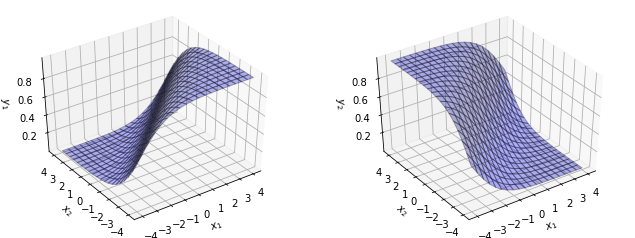

In [127]:
def softmax(x):
    x = np.exp(x)
    y = x / np.sum(x, axis=0)
    return y

x = np.linspace(-4, 4, 20)
x = np.meshgrid(x, x)
x = np.array(x)
y = softmax(x)

plt.figure(figsize=(11, 4))
for i in range(2):
    ax = plt.subplot(1, 2, i + 1, projection="3d")
    ax.plot_surface(x[0], x[1], y[i], color="blue", alpha=0.3, edgecolor="black")
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_zlabel(f"$y_{i + 1}$")
    ax.view_init(40, -125)


## ガウス関数

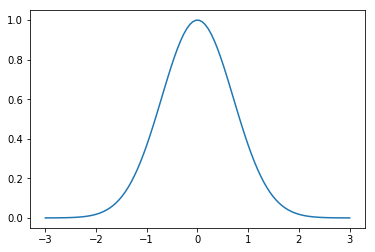

In [5]:
x = np.linspace(-3, 3, 100)
n = np.exp(-x ** 2)
plt.plot(x, n)

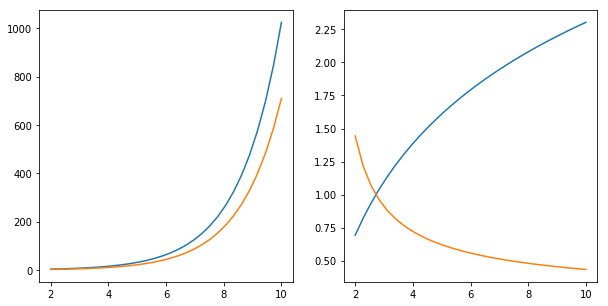

In [6]:
x = np.linspace(2, 10, 30)
plt.figure(figsize=(10, 5))

# 指数の微分
yA = 2 ** x
yB = 2 ** x * np.log(2)
plt.subplot(1, 2, 1)
plt.plot(x, yA)
plt.plot(x, yB)

# 対数の微分
yA = np.log(x)
yB = 1 / np.log(x)
plt.subplot(1, 2, 2)
plt.plot(x, yA)
plt.plot(x, yB)